In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("../../data/processed/weather_and_historical/processed_extreme_weather_events.csv", parse_dates=["start_date"])
temp_precip_df = pd.read_csv("../../data/processed/weather_and_historical/processed_temp_precipitation.csv", parse_dates=["date"])
print(temp_precip_df.columns)
print(weather_df.columns)



Index(['date', 'year', 'month', 'district', 'lat', 'lon', 't2m', 'prectot'], dtype='object')
Index(['disno', 'disaster_type', 'country', 'latitude', 'longitude',
       'start_date'],
      dtype='object')


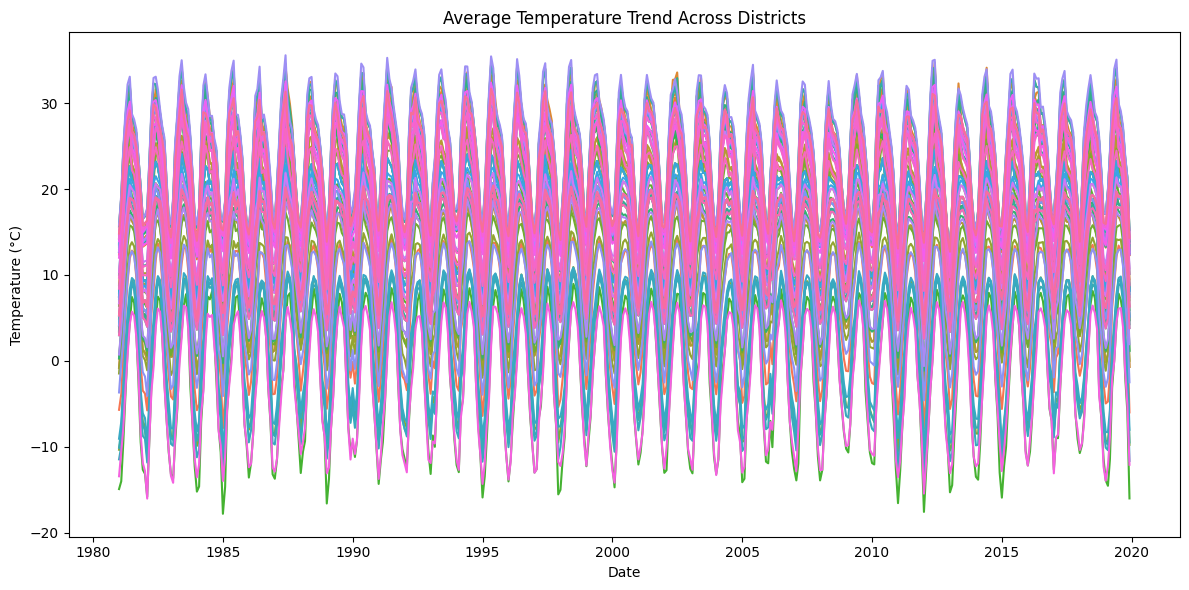

In [2]:
# Trend of average monthly temperature over time by district
monthly_temp = temp_precip_df.groupby(['year', 'month', 'district'])['t2m'].mean().reset_index()
monthly_temp['date'] = pd.to_datetime(dict(year=monthly_temp['year'], month=monthly_temp['month'], day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_temp, x='date', y='t2m', hue='district', legend=False)
plt.title("Average Temperature Trend Across Districts")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


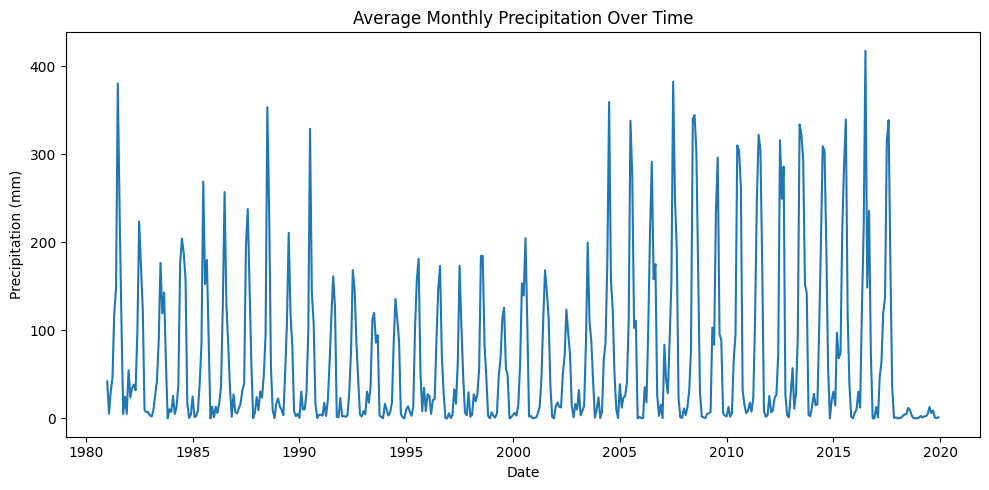

In [3]:
# Precipitation Patterns Over Time

monthly_precip = temp_precip_df.groupby(['year', 'month'])['prectot'].mean().reset_index()
monthly_precip['date'] = pd.to_datetime(dict(year=monthly_precip['year'], month=monthly_precip['month'], day=1))

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_precip, x='date', y='prectot')
plt.title("Average Monthly Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.tight_layout()
plt.show()


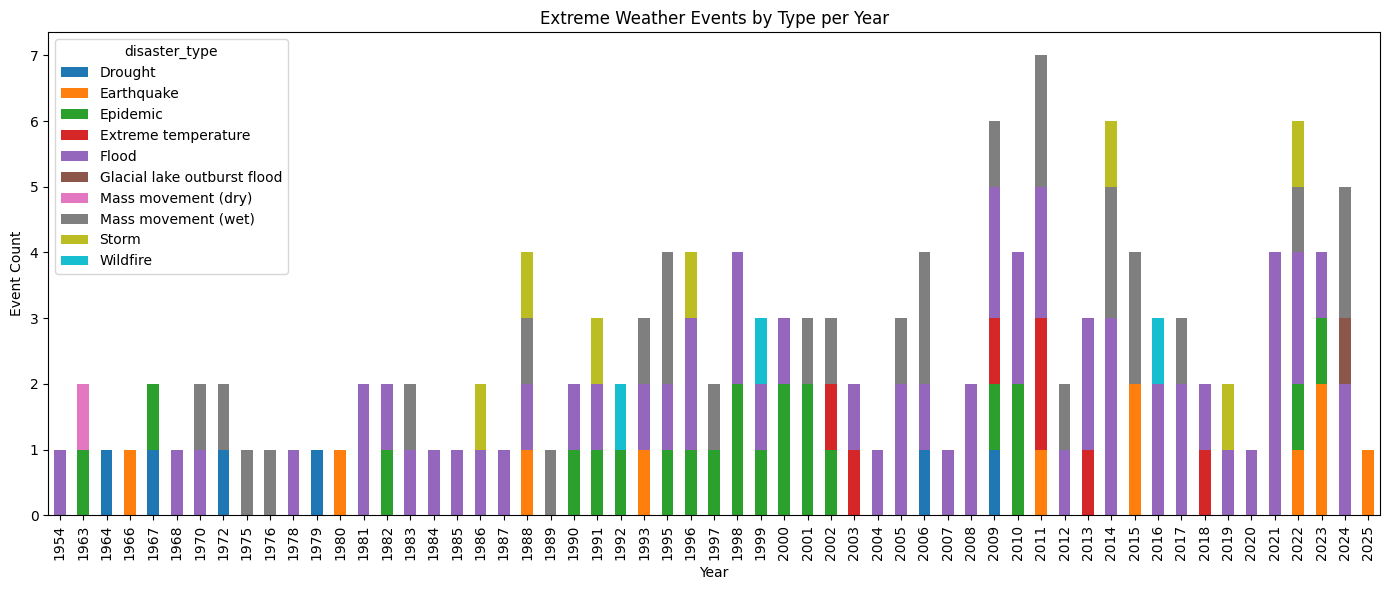

In [4]:
#Extreme Weather Frequency & Intensity
weather_counts = weather_df.groupby(['disaster_type', weather_df['start_date'].dt.year]).size().unstack(fill_value=0)

weather_counts.T.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Extreme Weather Events by Type per Year")
plt.xlabel("Year")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()


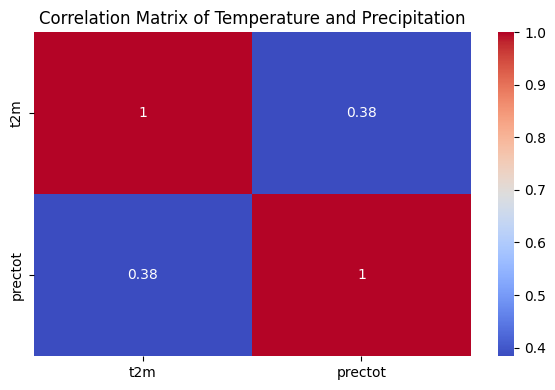

In [5]:
# Correlation between temperature and precipitation
correlation = temp_precip_df[['t2m', 'prectot']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Temperature and Precipitation")
plt.tight_layout()
plt.show()


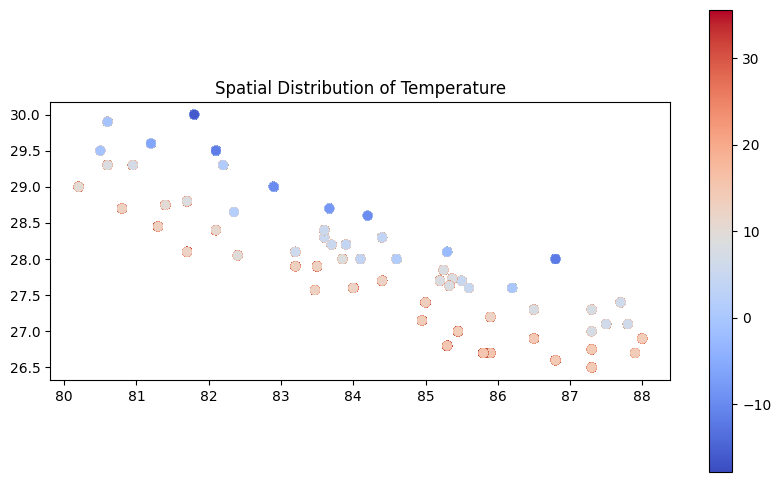

In [6]:
# Climate Vulnerability Mapping
import geopandas as gpd
from shapely.geometry import Point

# Assuming lat/lon columns are named `lat`, `lon`
geo_df = temp_precip_df.dropna(subset=['lat', 'lon'])
geo_df['geometry'] = [Point(xy) for xy in zip(geo_df.lon, geo_df.lat)]
gdf = gpd.GeoDataFrame(geo_df, geometry='geometry')

# Visualize temp distribution
gdf.plot(column='t2m', cmap='coolwarm', legend=True, figsize=(10, 6))
plt.title("Spatial Distribution of Temperature")
plt.show()


In [7]:
# Statistical Tests (e.g., Trend in Temperature Over Years)
from scipy.stats import linregress

yearly_avg_temp = temp_precip_df.groupby("year")["t2m"].mean()
slope, intercept, r_value, p_value, std_err = linregress(yearly_avg_temp.index, yearly_avg_temp.values)

print(f"Temperature Trend: slope = {slope:.3f}, p-value = {p_value:.3f}")


Temperature Trend: slope = 0.002, p-value = 0.768
